## Imports

In [5]:
import nltk
from pathlib import Path
import pandas as pd
import networkx as nx
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet
from matplotlib.colors import Normalize
from nltk.stem import WordNetLemmatizer

import warnings
warnings.filterwarnings('ignore')

### Fig 3a

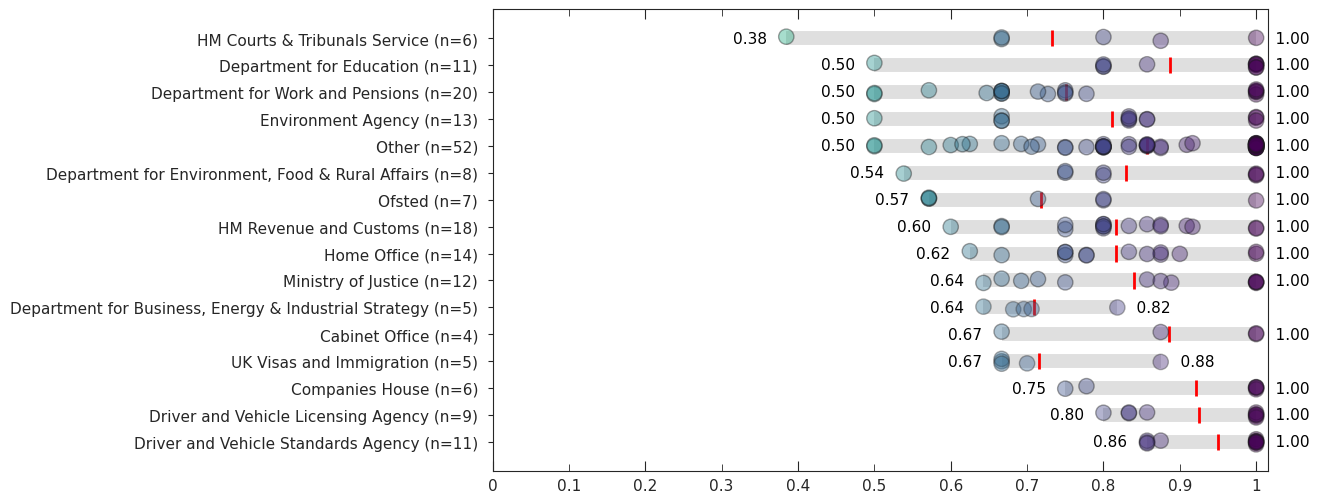

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)


def plot_dot_plot(save=True):
    # Load dataframe
    analysis_df = pd.read_pickle('../data/processed/dataframes/analysis-df-w-api-data.pkl')

    # Count the number of services per organization
    org_service_count = analysis_df['organisation'].value_counts()
    
    # Create a mask to identify organizations with less than 4 services
    mask = org_service_count < 4
    
    # Get the list of organizations with less than 4 services
    other_organisations = org_service_count[mask].index.tolist()
    
    # Replace the organizations with less than 4 services with 'Other'
    analysis_df['organisation'] = analysis_df['organisation'].apply(lambda x: 'Other' if x in other_organisations else x)
    
    # Add service count
    for organisation in analysis_df.organisation.unique():
        service_count = len(analysis_df.loc[analysis_df['organisation'] == organisation])
        analysis_df.organisation.replace(to_replace=organisation, value=f'{organisation} (n={service_count}) ', inplace=True)

    # Sort y-axis variables in ascending order according to the lowest RTI value
    sorted_orgs = analysis_df.groupby('organisation')['RTI_rescaled'].min().sort_values(ascending=True).index

    # Switch the y and x-axis orientation
    plt.figure(figsize=(10, 6))
    sns.set_style('ticks') 

    # Set the hue map for consistent coloring across the plot
    cmap = sns.color_palette('viridis_r', as_cmap=True)

    # Define the hue norm to ensure consistent hues across the plot
    hue_norm = plt.Normalize(0, 1)

    # Iterate through unique topics in the sorted order
    for organisation in sorted_orgs:
        org_data = analysis_df[analysis_df['organisation'] == organisation]['RTI_rescaled']

        # Plot the stripplot
        sns.stripplot(x=org_data, y=[organisation]*len(org_data), 
                      jitter=True,
                      linewidth=1, alpha=.4,
                      palette='viridis_r', size=11,
                      hue=org_data,
                      hue_norm=hue_norm)
        
        # Add numbers for the minimum and maximum values
        min_value = org_data.min()
        max_value = org_data.max()
        plt.text(min_value, organisation, f'{min_value:.2f}    ', color='black', va='center', ha='right', fontsize=11)
        plt.text(max_value, organisation, f'    {max_value:.2f}', color='black', va='center', ha='left', fontsize=11)

        # Add a light grey rectangle spanning the range of data points
        plt.fill_betweenx(y=organisation, x1=min_value, x2=max_value, color='gray', alpha=0.25, linewidth=10)   

        # Get the y-axis positions for each topic
        y_axis_positions = plt.gca().get_yticks()

        # Find the position for the current topic
        y_position = y_axis_positions[list(sorted_orgs).index(organisation)]

        # Calculate the mean for the topic's data
        mean_value = org_data.mean()

        # Calculate the height of each data point
        data_point_height = 0.6  # You may adjust this value

        # Draw a vertical line at the mean value with the same height as data points
        plt.vlines(x=mean_value, ymin=y_position - data_point_height / 2, ymax=y_position + data_point_height / 2,
                   color='red', linestyle='-', linewidth=2)

    # Set tick labels
    plt.yticks(fontsize=11)
    plt.xticks(ticks=[0, 0.2, 0.4, 0.6, 0.8, 1], 
               labels=[0, 0.2, 0.4, 0.6, 0.8, 1],
               minor=False, fontsize=11)
    plt.xticks(ticks=[0.1, 0.3, 0.5, 0.7, 0.9], 
               labels=[0.1, 0.3, 0.5, 0.7, 0.9],
               minor=True,  fontsize=11)
    plt.tick_params(
        axis='x',
        which='minor',
        direction='in',
        length=5,
        bottom=True,
        top=True,
        labelbottom=True,
        labeltop=False,
        labelsize=11,
        pad=5  # Set padding between tick labels and ticks
    )

    plt.tick_params(
        axis='x',
        which='major',
        direction='in',
        length=7,
        bottom=True,
        top=True,
        labelbottom=True,
        labeltop=False,
        labelsize=11,
        pad=5  # Set padding between tick labels and ticks
    )
    
    # Display the plot
    plt.title('')
    plt.xlabel('')
    plt.ylabel('')
    plt.xlim(0, 1.015)
    plt.legend([], [], frameon=False)
    
    # Save figure
    if save:
        plt.savefig(Path("../reports/figures/main-figures/fig3a.pdf"), dpi=1200, bbox_inches='tight')
    else:
        plt.show()

plot_dot_plot(save=True)

### Figure 3b

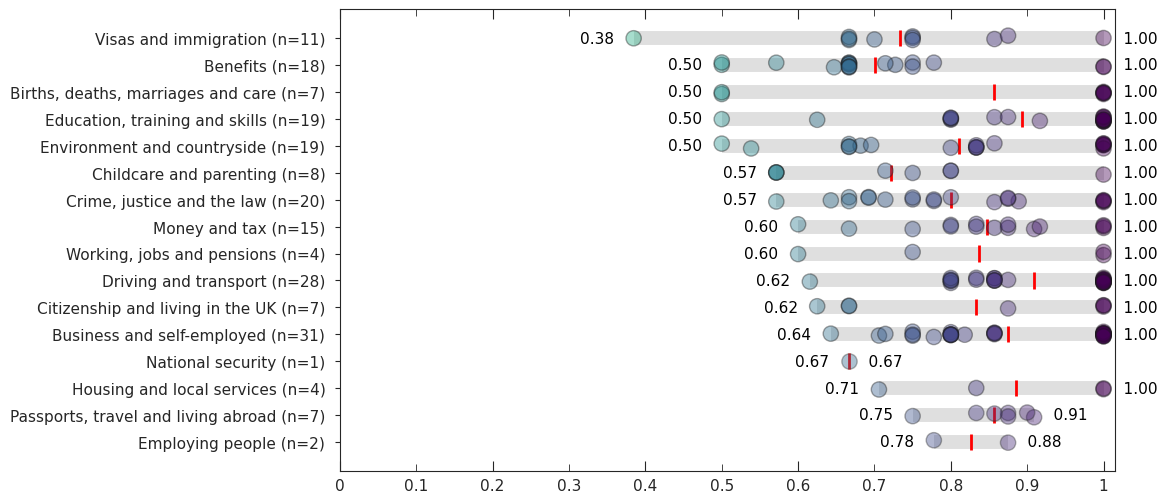

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)


def plot_dot_plot(save=True):
    # Load dataframe
    analysis_df = pd.read_pickle('../data/processed/dataframes/analysis-df-w-api-data.pkl')

    # Add service count
    for topic in analysis_df.topic.unique():
        service_count = len(analysis_df.loc[analysis_df['topic'] == topic])
        analysis_df.topic.replace(to_replace=topic, value=f'{topic} (n={service_count}) ', inplace=True)

    # Sort y-axis variables in ascending order according to the lowest RTI value
    sorted_topics = analysis_df.groupby('topic')['RTI_rescaled'].min().sort_values(ascending=True).index

    # Switch the y and x-axis orientation
    plt.figure(figsize=(10, 6))
    sns.set_style('ticks') 

    # Set the hue map for consistent coloring across the plot
    cmap = sns.color_palette('viridis_r', as_cmap=True)

    # Define the hue norm to ensure consistent hues across the plot
    hue_norm = plt.Normalize(0,1)

    # Iterate through unique topics in the sorted order
    for topic in sorted_topics:
        topic_data = analysis_df[analysis_df['topic'] == topic]['RTI_rescaled']

        # Plot the stripplot
        sns.stripplot(x=topic_data, y=[topic]*len(topic_data), 
                      jitter=True,
                      linewidth=1, alpha=.4,
                      palette=cmap, size=11,
                      hue=topic_data,
                      hue_norm=hue_norm 
                     )

        # Add numbers for the minimum and maximum values
        min_value = topic_data.min()
        max_value = topic_data.max()
        plt.text(min_value, topic, f'{min_value:.2f}    ', color='black', va='center', ha='right', fontsize=11)
        plt.text(max_value, topic, f'    {max_value:.2f}', color='black', va='center', ha='left', fontsize=11)

        # Add a light grey rectangle spanning the range of data points
        plt.fill_betweenx(y=topic, x1=min_value, x2=max_value, color='gray', alpha=0.25, linewidth=10)   

        # Get the y-axis positions for each topic
        y_axis_positions = plt.gca().get_yticks()

        # Find the position for the current topic
        y_position = y_axis_positions[list(sorted_topics).index(topic)]

        # Calculate the mean for the topic's data
        mean_value = topic_data.mean()

        # Calculate the height of each data point
        data_point_height = 0.6  # You may adjust this value

        # Draw a vertical line at the mean value with the same height as data points
        plt.vlines(x=mean_value, ymin=y_position - data_point_height / 2, ymax=y_position + data_point_height / 2,
                   color='red', linestyle='-', linewidth=2)

    # Set tick labels
    plt.yticks(fontsize=11)
    plt.xticks(ticks=[0, 0.2, 0.4, 0.6, 0.8, 1], 
               labels=[0, 0.2, 0.4, 0.6, 0.8, 1],
               minor=False, fontsize=11)
    plt.xticks(ticks=[0.1, 0.3, 0.5, 0.7, 0.9], 
               labels=[0.1, 0.3, 0.5, 0.7, 0.9],
               minor=True,  fontsize=11)
    plt.tick_params(
        axis='x',
        which='minor',
        direction='in',
        length=5,
        bottom=True,
        top=True,
        labelbottom=True,
        labeltop=False,
        labelsize=11,
        pad=5  # Set padding between tick labels and ticks
    )

    plt.tick_params(
        axis='x',
        which='major',
        direction='in',
        length=7,
        bottom=True,
        top=True,
        labelbottom=True,
        labeltop=False,
        labelsize=11,
        pad=5  # Set padding between tick labels and ticks
    )
    
    # Display the plot
    plt.title('')
    plt.xlabel('')
    plt.ylabel('')
    plt.xlim(0, 1.015)
    plt.legend([], [], frameon=False)
    
    # Save figure
    if save:
        plt.savefig(Path("../reports/figures/main-figures/fig3b.pdf"), dpi=1200, bbox_inches='tight')
    else:
        plt.show()

plot_dot_plot(save=True)

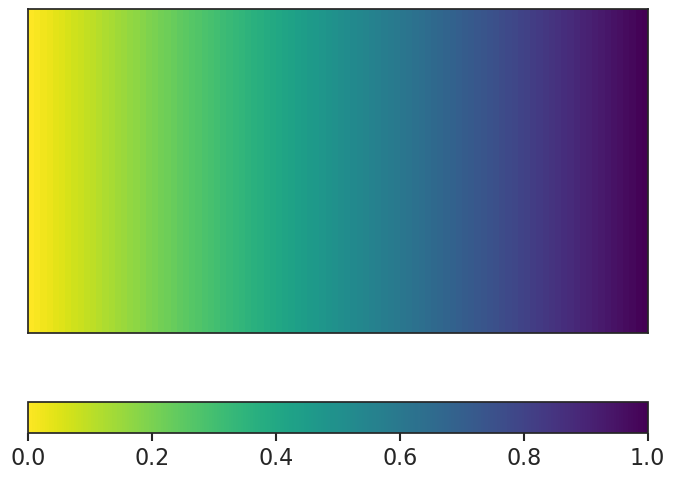

In [176]:
import matplotlib.colors as mcol
import matplotlib.pyplot as plt
import numpy as np

# Example usage: Create a colorbar to display the hue scale vertically
values = np.linspace(0, 1, 100)  # Values from 0 to 1
plt.figure(figsize=(8, 6))  # Adjust the figure size for vertical colorbar

plt.imshow([values], cmap='viridis_r', aspect='auto', extent=[0, 1, 0, 1])

# Set the background color of the plot and axis to #efefef
plt.gca().set_facecolor('#FFFFFF')

plt.xticks([])
plt.yticks([])

# Modify the colorbar ticks and labels
cb = plt.colorbar(orientation='horizontal', label='', ticks=np.linspace(0, 1, 6))
cb.set_ticks(np.linspace(0, 1, 6))
cb.ax.xaxis.set_tick_params(length=6, width=1.5)
cb.ax.tick_params(labelsize=16)

# Save the plot with background color #efefef
plt.savefig(Path("../reports/figures/main-figures/fig3-colorbar.pdf"), dpi=300, bbox_inches='tight')

### Figure 3b

In [202]:
import numpy as np

# Load analysis_df from pickle file
analysis_df = pd.read_pickle('../data/processed/dataframes/analysis-df-w-api-data.pkl')

# Load headcount_df from Excel file
headcount_df = pd.read_excel(
    '../data/processed/2021-2023-ODP-AOA-headcount.xlsx',
    usecols={'organisation': str, 'ODP_AOA_headcount': np.int32}
)

# Strip whitespace from 'organisation' column in headcount_df
headcount_df['organisation'] = headcount_df['organisation'].str.strip()

# Merge dataframes based on the 'organisation' column
merged_df = pd.merge(analysis_df, headcount_df, on='organisation', how='left')

# Create the 'ODP_AOA_headcount' column in analysis_df and fill with values from headcount_df
analysis_df['ODP_AOA_headcount'] = merged_df['ODP_AOA_headcount'].fillna(0)

# Create a new dataframe with columns
result_df = pd.DataFrame(columns=[
    'Share of routine tasks', 
    '# of services', 
    '% of services', 
    '# of organisations', 
    '# of service delivery professionals',
])

# Step 3: Fill '# of services'
result_df.loc['RTI=0'] = [0] * 5  # Initialize the row with zeros
result_df.at['RTI=0', '# of services'] = len(
    analysis_df[analysis_df['RTI_perc'] == 0])

result_df.loc['RTI<0.5'] = [0] * 5
result_df.at['RTI<0.5', '# of services'] = len(
    analysis_df[(analysis_df['RTI_perc'] < 50)])

result_df.loc['RTI>=0.5'] = [0] * 5
result_df.at['RTI>=0.5', '# of services'] = len(
    analysis_df[(analysis_df['RTI_perc'] >= 50)])

result_df.loc['RTI>=0.75'] = [0] * 5
result_df.at['RTI>=0.75', '# of services'] = len(
    analysis_df[(analysis_df['RTI_perc'] >= 75)])

result_df.loc['RTI=1'] = [0] * 5
result_df.at['RTI=1', '# of services'] = len(
    analysis_df[analysis_df['RTI_perc'] == 100])

# Step 4: Fill '% of services'
result_df['% of services'] = (result_df['# of services'] / len(analysis_df['service'])) * 100

# Step 5: Fill # of organisations
result_df.at['RTI=0', '# of organisations'] = len(
    analysis_df.loc[analysis_df['RTI_perc'] == 0].organisation.unique())
result_df.at['RTI<0.5', '# of organisations'] = len(
    analysis_df.loc[analysis_df['RTI_perc'] < 50].organisation.unique())
result_df.at['RTI>=0.5', '# of organisations'] = len(
    analysis_df.loc[analysis_df['RTI_perc'] >= 50].organisation.unique())
result_df.at['RTI>=0.75', '# of organisations'] = len(
    analysis_df.loc[analysis_df['RTI_perc'] >= 75].organisation.unique())
result_df.at['RTI=1', '# of organisations'] = len(
    analysis_df.loc[analysis_df['RTI_perc'] == 100].organisation.unique())

# Step 3: Fill '# of services'
result_df.at['RTI=0', '# of services'] = len(
    analysis_df[analysis_df['RTI_perc'] == 0])

result_df.at['RTI<0.5', '# of services'] = len(
    analysis_df[(analysis_df['RTI_perc'] < 50)])

result_df.at['RTI>=0.5', '# of services'] = len(
    analysis_df[(analysis_df['RTI_perc'] >= 50)])

result_df.at['RTI>=0.75', '# of services'] = len(
    analysis_df[(analysis_df['RTI_perc'] >= 75)])

result_df.at['RTI=1', '# of services'] = len(
    analysis_df[analysis_df['RTI_perc'] == 100])

# Step 4: Fill '% of services'
result_df['% of services'] = (result_df['# of services'] / len(analysis_df['service'])) * 100

# Step 6: Fill # of organisations
result_df.at['RTI=0', '# of organisations'] = len(
    analysis_df.loc[analysis_df['RTI_perc'] == 0].organisation.unique())
result_df.at['RTI<0.5', '# of organisations'] = len(
    analysis_df.loc[analysis_df['RTI_perc'] < 50].organisation.unique())
result_df.at['RTI>=0.5', '# of organisations'] = len(
    analysis_df.loc[analysis_df['RTI_perc'] >= 50].organisation.unique())
result_df.at['RTI>=0.75', '# of organisations'] = len(
    analysis_df.loc[analysis_df['RTI_perc'] >= 75].organisation.unique())
result_df.at['RTI=1', '# of organisations'] = len(
    analysis_df.loc[analysis_df['RTI_perc'] == 100].organisation.unique())

# Step 7: Fill # of employess
headcounts = dict(zip(analysis_df.organisation, analysis_df.ODP_AOA_headcount))

h_t = 0
for org in analysis_df.loc[analysis_df['RTI_perc'] == 0].organisation.unique():
    h_t += headcounts[org]
result_df.at['RTI=0', '# of service delivery professionals'] = h_t

h_t = 0
for org in analysis_df.loc[analysis_df['RTI_perc'] < 50].organisation.unique():
    h_t += headcounts[org]
result_df.at['RTI<0.5', '# of service delivery professionals'] = h_t

h_t = 0
for org in analysis_df.loc[analysis_df['RTI_perc'] >= 50].organisation.unique():
    h_t += headcounts[org]
result_df.at['RTI>=0.5', '# of service delivery professionals'] = h_t

h_t = 0
for org in analysis_df.loc[analysis_df['RTI_perc'] >= 75].organisation.unique():
    h_t += headcounts[org]
result_df.at['RTI>=0.75', '# of service delivery professionals'] = h_t

h_t = 0
for org in analysis_df.loc[analysis_df['RTI_perc'] == 100].organisation.unique():
    h_t += headcounts[org]
result_df.at['RTI=1', '# of service delivery professionals'] = h_t

headcounts = dict(zip(analysis_df.organisation, analysis_df.ODP_AOA_headcount))

result_df

,Share of routine tasks,# of services,% of services,# of organisations,# of service delivery professionals
RTI=0,0,0,0.000000,0,0
RTI<0.5,0,1,0.497512,1,10430
RTI>=0.5,0,200,99.502488,46,76233
RTI>=0.75,0,149,74.129353,41,75523
RTI=1,0,66,32.835821,30,70133


- All operational delivery professional Administrative Officers and Assistant employees ≈ 111,092

- Operational delivery professionals include: Administrative Officers and Assistants, Executive Officers, Senior and Higher Executive Officers, Grades 6 and 7 and Senior Civil Service Level; above we report only Administrative Officers and Assistants (AOA) headcounts


- Notes: Users should note the variable and high non-response rates for professions and functions for a number of organisations and should exercise appropriate caution when drawing conclusions from these statistics or when making comparisons between organisations or over time. Numbers are rounded to the nearest ten, and cells containing between one and five employees are represented by "..". Cabinet Office (excl. agencies) did not supply professions information on 9,340 of their staff. Source: https://www.gov.uk/government/statistics/summary-of-civil-servants-in-the-operational-delivery-profession-2021

- Source for Cabinet Office, Department for Education, Institute for Apprenticeships and Technical Education Department for Health and Social Care: https://www.gov.uk/government/statistics/civil-service-statistics-2022/statistical-bulletin-civil-service-statistics-2022#profession

- Source for Office for Product Safety and Standards: https://assets.publishing.service.gov.uk/media/5fca117c8fa8f5474d282ac1/opss-delivery-report-2019-2020.pdf

- Source for DWP: https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwiB6t-FvNWCAxVWXEEAHWjFArgQFnoECBAQAQ&url=https%3A%2F%2Fassets.publishing.service.gov.uk%2Fmedia%2F5c9b32a0e5274a528752d56c%2Fworkforce-management-feb-2019.csv&usg=AOvVaw05VFp73VX7W02ZFvepa3oh&opi=89978449

- Excluded organisationsStud (which all have n < 3 servies except for the Environment Agency where n=13) because data are not available: : ent Loans Company, Innovate UK, NHS Business Services Authority, The Charity Commission, Disclosure and Barring Service, Care Quality Commissions, Office for Zero Emission Vehicles, Marine Management Organisation, NHS Digital, General Register Office, Environment Agency, Department for Digital, Culture, Media and Sport